<a href="https://colab.research.google.com/github/KatharinaGardens/computational-linguistics.github.io/blob/Week-5/Week_5_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LELA32052 Computational Linguistics Week 5

This week we are going to start to look at machine learning - specifically at supervised machine learning. Supervised machine learning refers to any situation where the computer is given a set of inputs and outputs, and learns a model that allows it to turn new inputs into outputs. Our main focus today will be on classification - where a set of words or sentences are given as input, and the machine must learn to assign one of a set of finite labels as output.

However, we will build up to this and will start with an even simpler form of machine learning  - linear regression.

In linear regression the machine learns to map input to continuous valued outputs.



In the following data we have continuous values as input (X, on the horizontal axis) and output (Y, on the vertical axis)

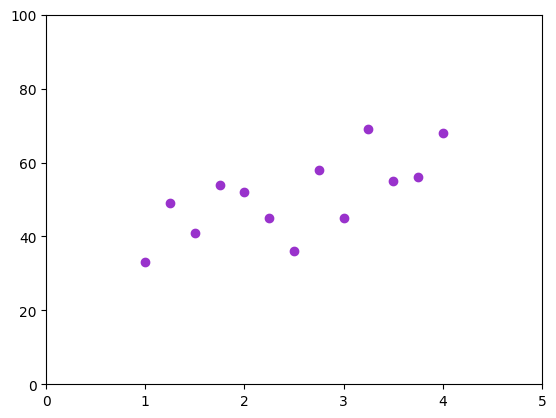

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = [1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00]
y = [33,49,41,54,52,45,36,58,45,69,55,56,68]
x = np.array(x)
y = np.array(y)

plt.scatter(x, y, color = 'darkorchid')
plt.ylim(0,100)
plt.xlim(0,5)

plt.show()

We assume that is it possible to predict y using a linear equation - consisting of just a bias term (known in statistics as the intercept) and slope. This can be visualised as a straight line.

Y = Bias + X*Slope

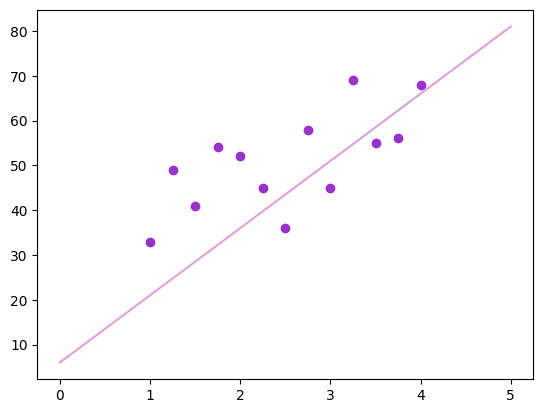

In [20]:
line_x = [0, 5]
line_y = [6, 6+75]

plt.scatter(x, y, color = 'darkorchid')
plt.plot(line_x, line_y, label='Line', color='plum')  # Adding a line

The machine learns to do this by finding the values of the bias and the slope that minimises the "loss".

The loss is "the mean squared error" - we calculate the difference of each predicted value (as described by the line) and the target value (the dots), we square each value, and we take the mean.

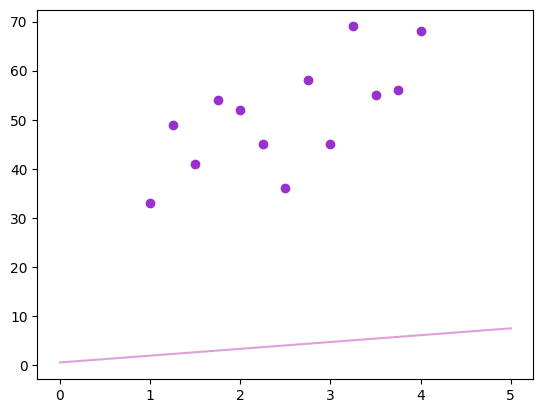

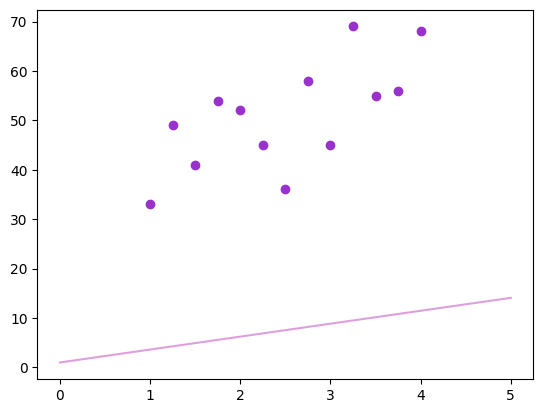

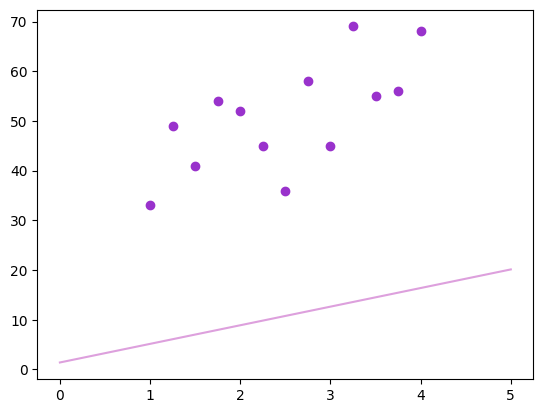

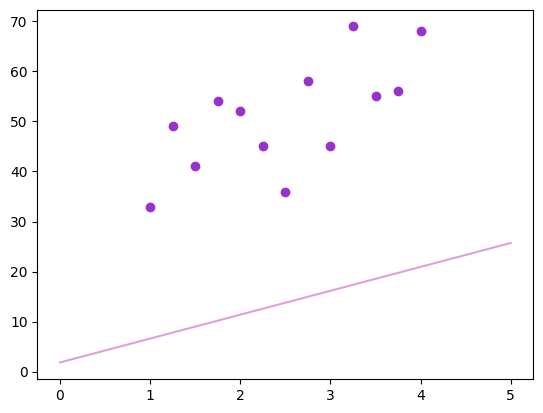

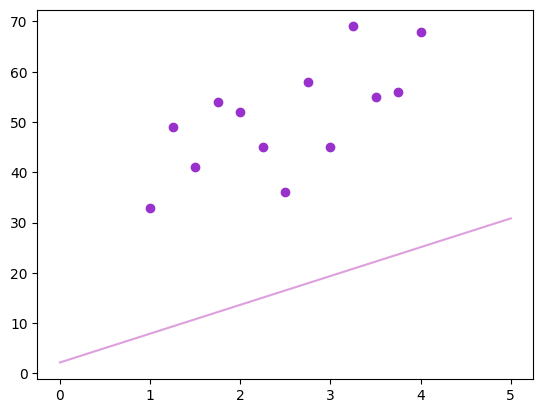

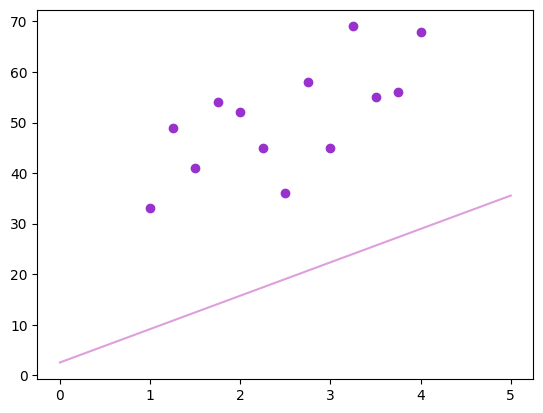

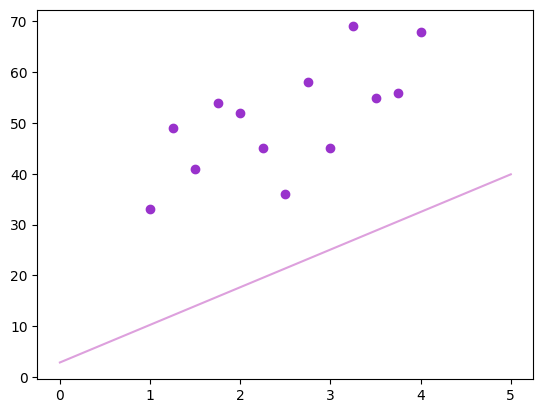

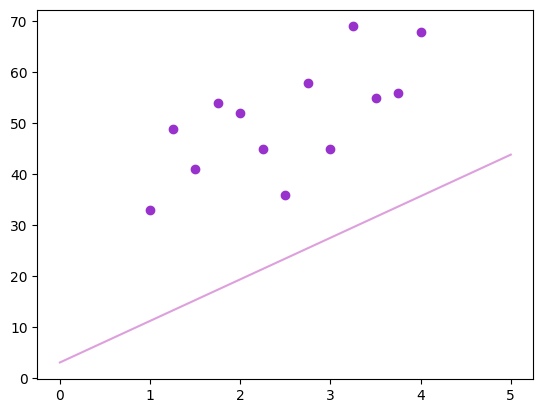

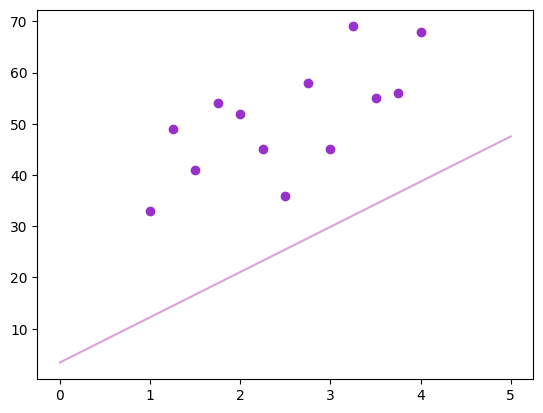

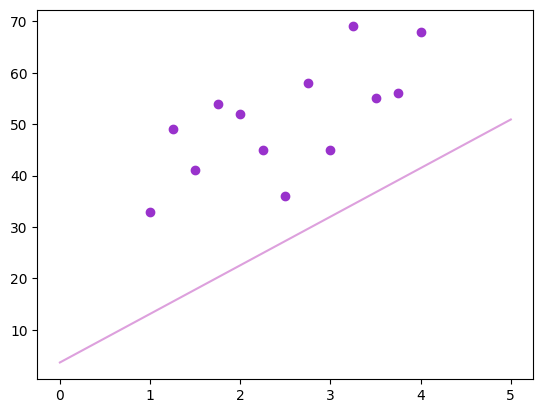

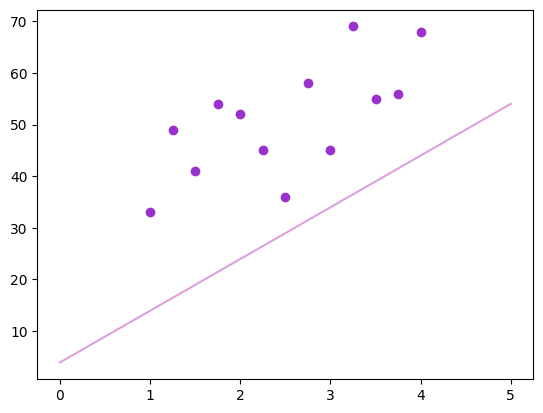

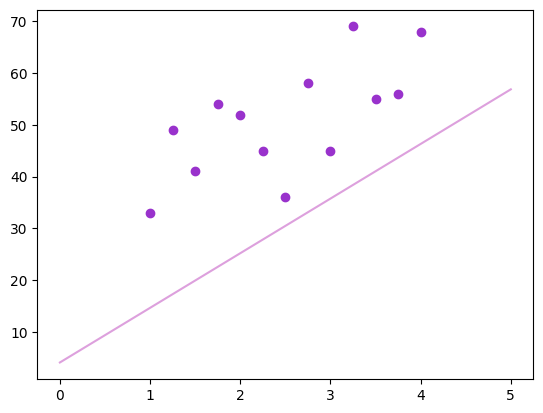

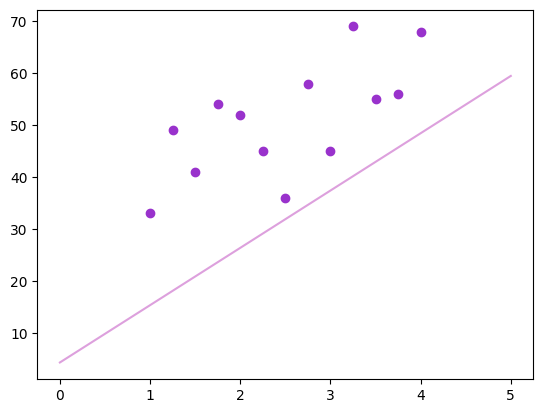

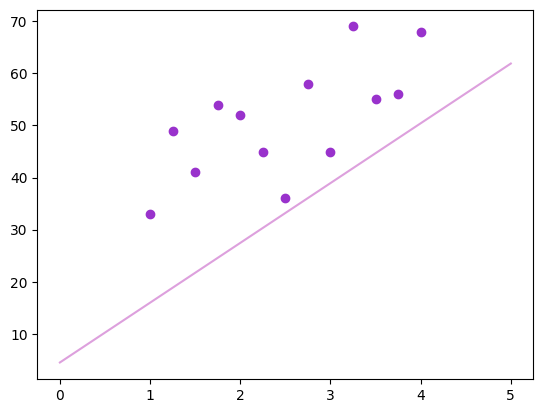

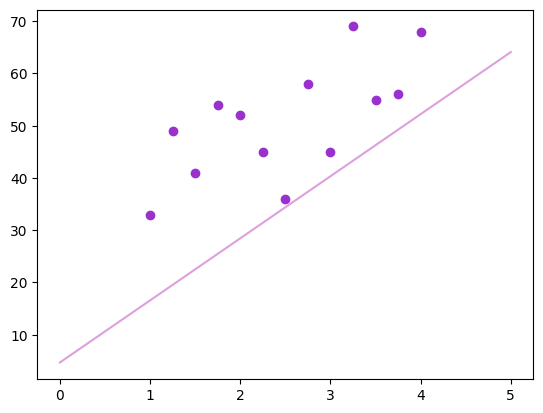

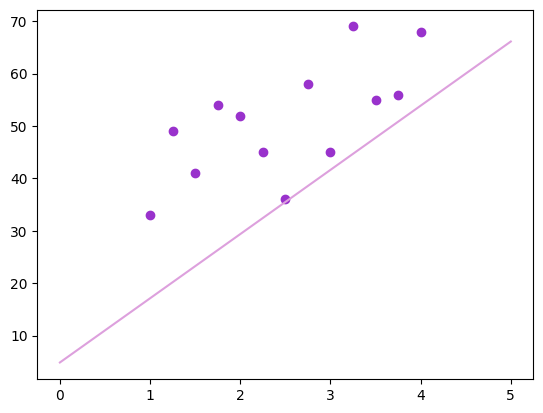

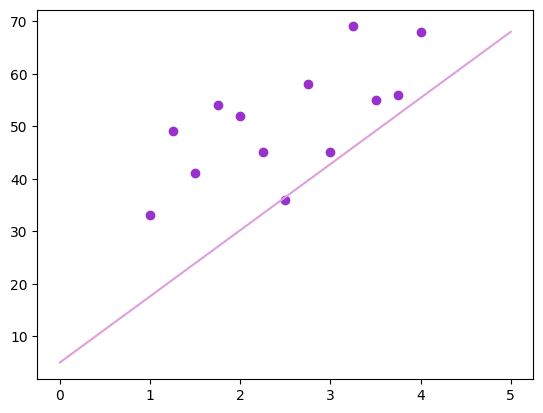

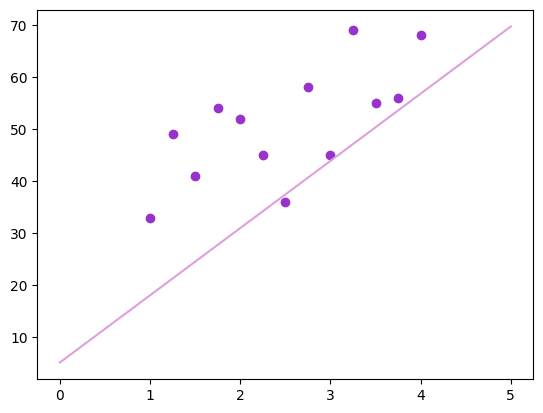

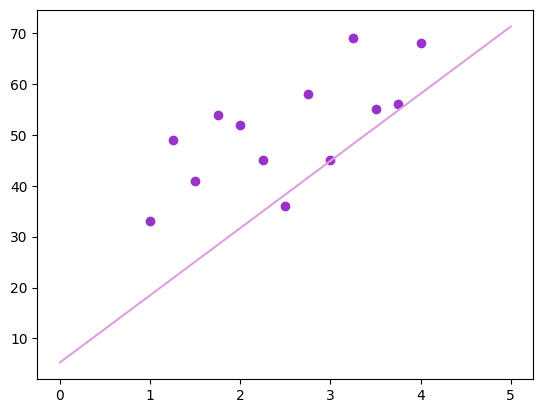

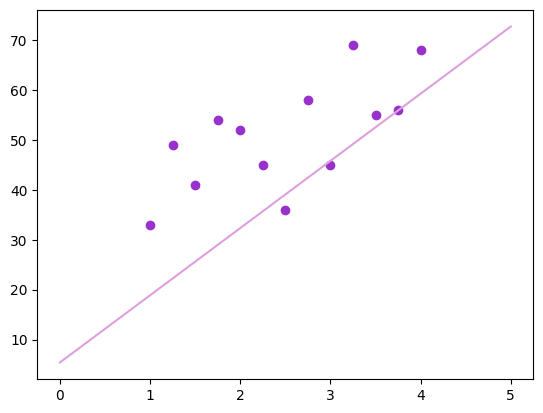

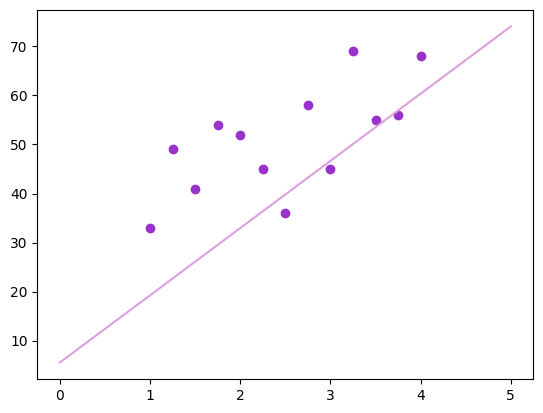

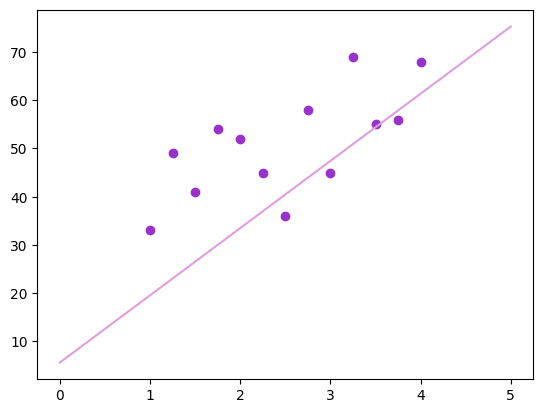

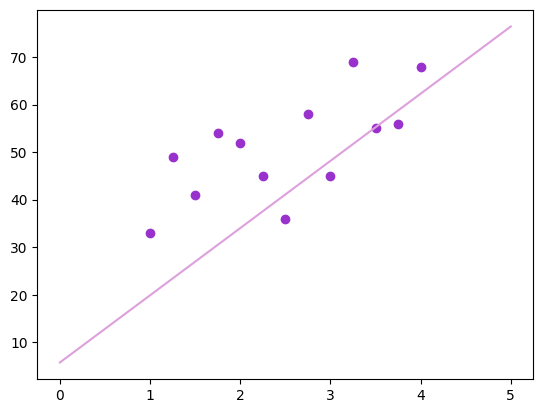

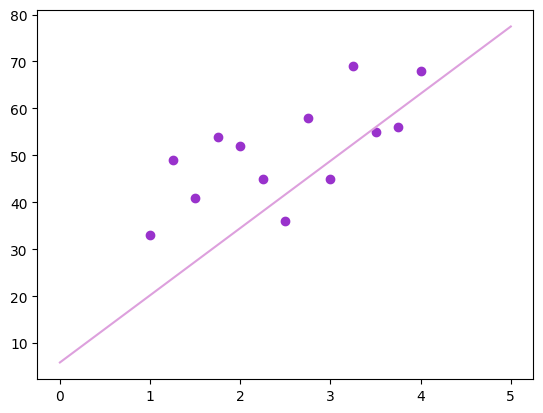

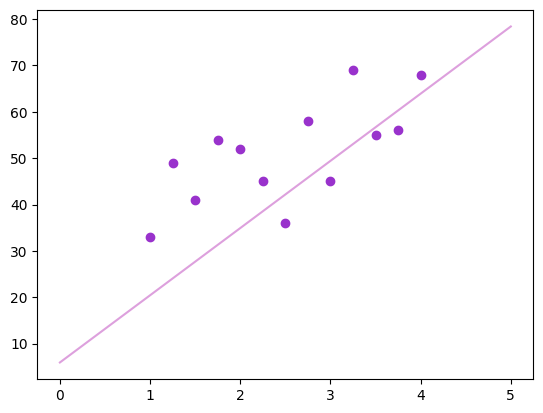

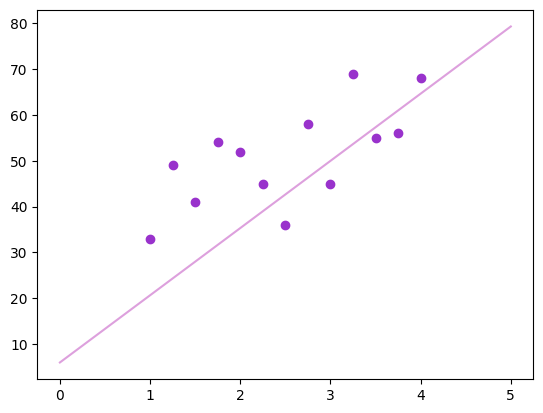

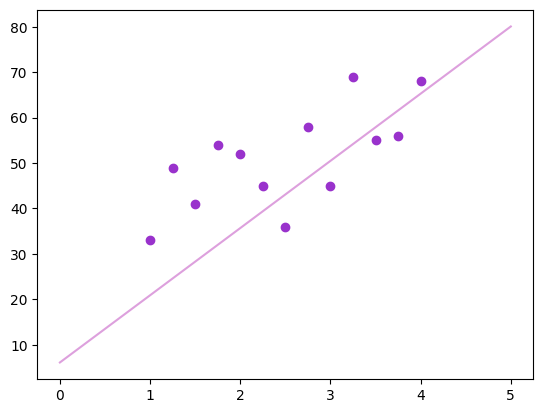

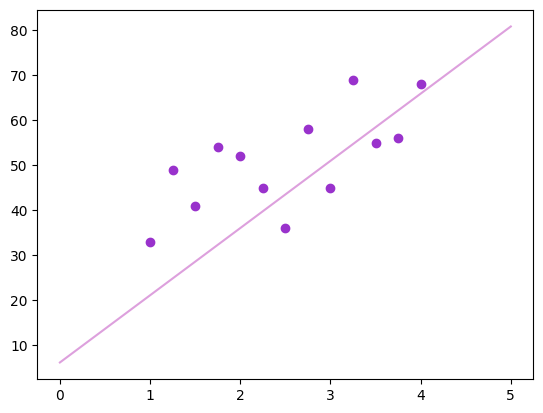

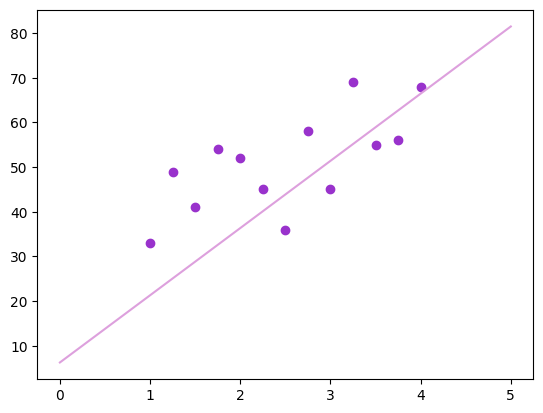

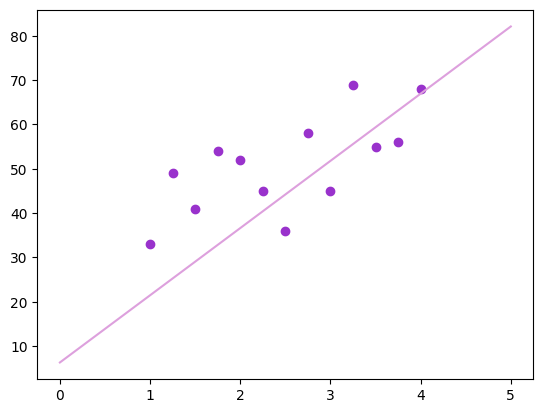

Text(0, 0.5, 'loss')

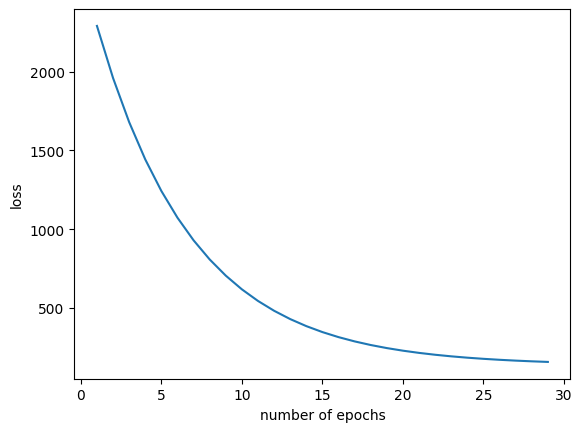

In [22]:
n_iters = 30
num_features=1
weight = np.random.rand(num_features)[0]
bias=0
linear_loss=[]

num_samples = len(y)
lr=0.01

for i in range(n_iters):
    y_est = x*weight+bias
    #print(y_est)
    #´print(y)
    errors = y_est-y
    #print(errors)
    loss = errors.dot(errors)/num_samples
    linear_loss.append(loss)

    dw = (1 / num_samples) * sum(x*errors)
    db = (1 / num_samples) * sum(errors)
    weight = weight - lr * dw
    bias = bias - lr * db
    line_x = [0, 5]
    line_y = [bias, bias+(5*weight)]

    plt.scatter(x, y, color ='darkorchid')
    plt.plot(line_x, line_y, label='Line', color='plum')  # Adding a line

    plt.show()

plt.plot(range(1,n_iters),linear_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [23]:
bias

6.320543188715396

In [24]:
weight

15.153609674951216

Problem 1: We can think of X as the number of days a students studied for an exam, and Y as the mark they received. Calculate the expected exam grade for students who studied for the following amounts of time:
a) 0 days
b) 3 days
c) 4.5 days

In [29]:
xlist = [0,3,4.5]

for item in xlist:
  print("Expected exam grade for students who studied " + str(item) + " days: " + str(round(item*weight + bias, 2)))

Expected exam grade for students who studied 0 days: 6.32
Expected exam grade for students who studied 3 days: 51.78
Expected exam grade for students who studied 4.5 days: 74.51


### Logistic Regression

Next we are going to look at  1-layer neural networks, also known as logistic regression models or as perceptrons. These were introduced to you in abstract in the lecture and in this seminar we are going to look at how they work in reality.

Perceptrons are commonly used as binary classifiers - applying one of two possible labels to input. The example that we are going to look at today is sentiment classification, where we classify a text as having either a "negative" or "positive" perspective on whatever it is discussing, e.g. a product it is reviewing.

First of all we will look at a toy problem with some made up data, then we will look at some real sentiment data. The stars in the plot are the reviews with positive sentiment. The circles are reviews with negative sentiment.

In [ ]:
## Create simulated data
np.random.seed(10)
w1_center = (2, 3)
w2_center = (3, 2)
batch_size=50

x = np.zeros((batch_size, 2))
y = np.zeros(batch_size)
for i in range(batch_size):
    if np.random.random() > 0.5:
        x[i] = np.random.normal(loc=w1_center)
    else:
        x[i] = np.random.normal(loc=w2_center)
        y[i] = 1

x=x.T

plt.scatter(x[0][y==0], x[1][y==0], marker='*', s=100)
plt.scatter(x[0][y==1], x[1][y==1], marker='o', s=100)
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))

So now instead of just one input value X we have two input values x_1 and x_2.
The learning component works similarly to the linear regression case, except that instead of a bias and a single slope, we have a bias and two "weights".

Z = Bias + x_1*Weight1 + x_2 *Weight2

In [ ]:
np.random.seed(10)
num_features=2
weights = np.random.rand(num_features)
bias=0

n_iters = 100
num_features = 2
num_samples = len(y)
lr=0.01
logistic_loss=[]

xmin, xmax = 0, 5
ymin, ymax = 0, 5
xd = np.array([xmin, xmax])

for i in range(n_iters):
    #z=x[0]*weights[0] + x[1]*weights[1] + bias
    z=weights.dot(x) + bias
    q = 1/(1+np.exp(-z))
    loss = sum(-(y*np.log2(q)+(1-y)*np.log2(1-q)))/num_samples
    logistic_loss.append(loss)
    dw1 = sum(x[0]*(q-y))/num_samples
    dw2 = sum(x[1]*(q-y))/num_samples
    db = sum(q-y)/num_samples
    weights[0] = weights[0] - dw1*lr
    weights[1] = weights[1] - dw2*lr
    bias = bias - db*lr
    plt.scatter(x[0][y==0], x[1][y==0], marker='*', s=100)
    plt.scatter(x[0][y==1], x[1][y==1], marker='o', s=100)
    plt.xlim((0,5))
    plt.ylim((0,5))
    c = -bias/weights[1]
    m = -weights[0]/weights[1]
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.show()


plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [ ]:
weights

In [ ]:
bias

Problem 2: Given the bias and weights above Calculate Z for the following inputs

a) X1 of 2 and X2 of 4

b) X1 of 3 and X2 of 1

We want our output to be a probability. We therefore convert Z into a value between 0 and 1 using the sigmoid function (See Lecture)

In [ ]:
def sigmoid(z):
  return(1/(1+np.exp(-z)))

In [ ]:
sigmoid(1.5)

Problem 3. Convert the Z values from Problem 2 into probabilities. These values are p(Positive Sentiment | X)

### Logistic regression with text: sentiment analysis

The dataset we are going to use here is 10000 reviews on Yelp classified as negative (1 or 2 star) or positive (3 or 4 star). We are going to train a classifier using a part of this data and test its performance on another part.

First we download and load the dataset:

In [ ]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/data/yelp_reviews.txt

# Create lists
reviews=[]
labels=[]

with open("yelp_reviews.txt") as f:
   # iterate over the lines in the file
   for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip().split('\t')
        # put the current review in the reviews list
        reviews.append(fields[0])
        # put the current sentiment rating in the labels list
        labels.append(fields[1])

In [ ]:
reviews[6000]

In [ ]:
labels[6000]

### One-hot coding

We are going to represent our data using one-hot encoding. We need to use the same vocabulary for our training and test data so we do this prior to splitting the data.

In order to one-hot encode we need to create a list of the included vocabulary items. We will use the 5000 most frequent words. To get this list we extract all the words from all the reviews, count how often they occur, sort them and then take the most frequent 5000 words.

In [ ]:
from collections import Counter
import re
# Tokenise the text, turning a list of strings into a list of lists of tokens. We use very naive space-based tokenisation.
tokenized_sents = [re.findall("[^ ]+",txt) for txt in reviews]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
counts=Counter(tokens)
# Sort the tuples. The reverse argument instructs to put most frequent first rather than last (which is the default)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
# Extract the list of tokens, by transposing the list of lists so that there is a list of tokens a list of counts and then just selecting the former
so=list(zip(*so))[0]
# Select the firs 5000 words in the list
type_list=so[0:5000]

We are now ready to one-hot encode our reviews. We have 10000 reviews and a selected vocabulary of 5000 words. We therefore want to end up with 10000 x 5000 matrix **M**, where each row $i$ is a review, each column $j$ is a unique word from the vocab, and each element $x_{i,j}$ is a one if the word j occurs in review i and a zero otherwise.

In [ ]:
# Create a 10000 x 5000 matrix of zeros
M = np.zeros((len(reviews), len(type_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = re.findall("[^ ]+",rev)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1



This one-hot vector:

In [ ]:
M[100,]

Is a representation of this review

In [ ]:
reviews[100]

For which this is the label

In [ ]:
labels[100]

Now we are ready to split our data. We are going to use 20% of our data as test items, so we randomly select 8000 indices between 0 and 9999, which are the indices of our training items. The remaining 2000 indices are the indices of our test items.

In a real development task we would want to split data into training, development and test. Here we just use training and test.

In [ ]:
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))

We next use the indices to select the rows of our one-hot-encoded matrix M that correspond to our training items and our test items and put these into two separate matrices. We also select the corresponding labels.

In [ ]:
M_train = M[train_ints,]
M_test = M[test_ints,]
labels_train = [labels[i] for i in train_ints]
labels_test = [labels[i] for i in test_ints]

Now we are ready to train our model using the training data.

In [ ]:
import math

num_features=5000
y=[int(l == "positive") for l in labels_train]
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 500
lr=0.4
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters):
  z = M_train.dot(weights)+bias
  q = 1/(1+np.exp(-z))
  eps=0.00001
  loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
  logistic_loss.append(loss)
  y_pred=[int(ql > 0.5) for ql in q]

  dw = (q-y).dot(M_train)/num_samples
  db = sum((q-y))/num_samples
  weights = weights - lr*dw
  bias = bias - lr*db

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")
#loss = sum(-(np.ones(len(y))*np.log2(q)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q)))

Now that we have a fitting model, we can use it to predict labels for our test items. The test reviews are in the one-hot matrix M_test. The labels for the test reviews are in the list labels_test.


In [ ]:
z = M_test.dot(weights)+bias
q = 1/(1+np.exp(-z))

In [ ]:
y_test=[int(l == "positive") for l in labels_test]
y_test_pred=[int(ql > 0.5) for ql in q]
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
print(sum(acc_test)/len(acc_test))